# Лабораторная работа 1. Траектория движения тела. Графики функций

#### Зикрацкий Антон Дмитриевич, 11.02.2023

## Задание 1.1. Задача о падении тела

**Постановка задачи**. Тело запущено под углом $\alpha$ к горизонту на
высоте $h_{start}$ и через время $t=T$ достигает другое тело, расположенное
на расстоянии $s_{end}$ и высоте $h_{end}$.
$$F=m(0,-g),$$
где $m$- масса тела, $g$- ускорение свободного падения. Сопротивлением среды пренебрегаем.
$$$$
**Данные**. Выполните задание при следующих значениях параметров:$h_{start}=20$m, $T = 2$s, $s_{end}=50$m, $h_{end}=10$m,$g \approx 9.807 m/s^2 $.Значение массы тела m не приводится, так как эта величина при построении математической модели не будет учитываться. Начальный момент времени движения тела полагаем равным нулю $t=0$.
$$$$
**Задания для выполнения**. $\color{red}{Определите}$ функцию
перемещения тела $(s_{x}(t),s_{y}(t))$ под действием силы тяжести, где
$s_{x}(t)$ и $s_{y}(t)$ — горизонтальная и вертикальная составляющая
положения тела в момент времени $t$, соответственно. $\color{red}{Постройте}$ график траектории движения тела $(s_x(t),s_y(t))$ для $t \in [0,T]$. $\color{red}{Найдите}$ угол запуска тела $\alpha$.

### Этап 1. Импортирование модулей

In [1]:
import math

In [2]:
!pip install numpy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np

In [4]:
#!pip install matplotlib

In [5]:
import matplotlib.pyplot as plt

In [6]:
#!pip install scipy

In [7]:
import scipy.constants as const

In [8]:
#!pip install sympy

In [9]:
import sympy

### Этап 2. Создание переменных

In [10]:
h_start = 20 # вертикальная составляющая положения тела в момент запуска
T = 2.0 # время полета
s_end = 5.0e1 # горизонтальное перемещение тела за время полета
h_end = 1.0E+1 # вертикальная составляющая положения тела в конечный момент движения

In [11]:
s_end

50.0

In [12]:
h_end

10.0

In [13]:
type(h_start), type(T)

(int, float)

In [14]:
h_start # переменная не отобразится
T # переменная отобразится

2.0

In [15]:
print(h_start, T)

20 2.0


In [16]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

In [17]:
range(int(T/0.01))

range(0, 200)

In [18]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/step))]
t_array = np.arange(0,T,step)  

In [19]:
type(t_list), type(t_array)

(list, numpy.ndarray)

In [20]:
len(t_list), len(t_array)

(200, 200)

In [21]:
?range

In [22]:
t_list.append(t_list[-1] + step)
len(t_list)

201

### Этап 3. Определение функции перемещения и нахождение угла запуска тела

In [23]:
v0_x = s_end/T
v0_x 

25.0

In [24]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

4.806649999999999

In [25]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha) # угол в радианах и градусах

(0.1899480821870468, 10.883223435921874)

In [26]:
f"s_x(t) = {h_start} + {v0_y} t - {g}/2*t\N{superscript two}"

's_x(t) = 20 + 4.806649999999999 t - 9.80665/2*t²'

In [27]:
f"s_y(t) = {v0_x} t"

's_y(t) = 25.0 t'

### Этап 4. Построение графика траектории движения тела

In [28]:
t_list, t_array; # символ ; в конце выражения предотвращает вывод результата выполнения ячейки кода 

In [29]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

In [30]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

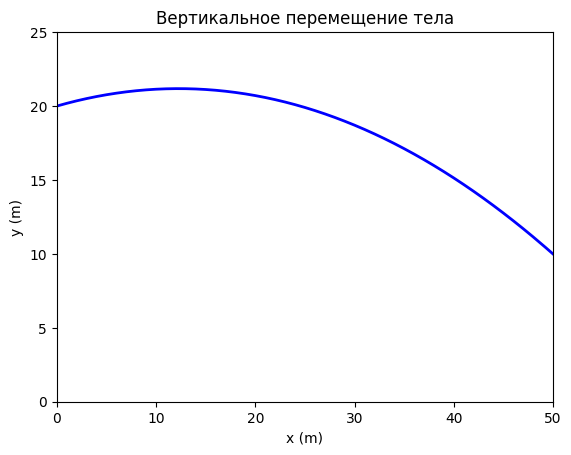

In [31]:
plt.figure() #можно и без этого, но для систематичности удобнее
plt.plot(s_x_list,s_y_list,'b-',lw=2) #lw - толщина
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') # символ ; позволяет записывать несколько выражений в одной строке
plt.axis([0, s_end, 0, h_end+15]); #задаем координаты рамок

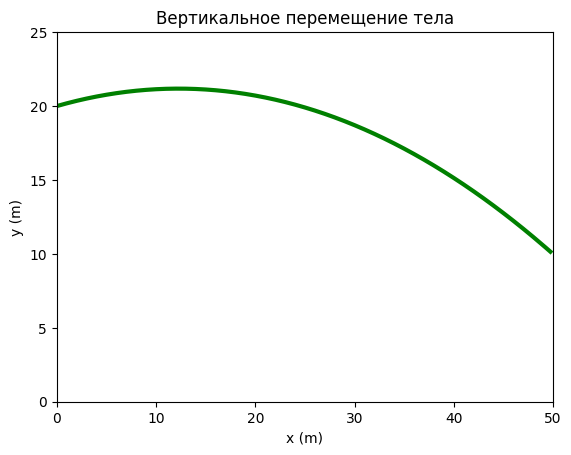

In [33]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')

# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+15);

## Задание 1.2. Момент времени падения тела

### Точное решение

In [19]:
 ?sympy.solve

In [20]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t) #решаем, уравнение по у(когда = 0), относительно t
result #нашли два корня уравнения, выбираем положительный(т.к. время неотрицательное)

[-1.58810350289582, 2.56838728991789]

In [21]:
t_star_exact = result[-1]
t_star_exact

2.56838728991789

### *ДОП*

In [45]:
step = 0.01
t_ar = np.arange(0,t_star_exact,step)  

In [60]:
s_x_ar = v0_x*t_ar
s_y_ar = h_start+v0_y*t_ar-g*t_ar**2/2

In [26]:
x_end = np.array([v0_x*t_star_exact])
y_end = np.array([0])

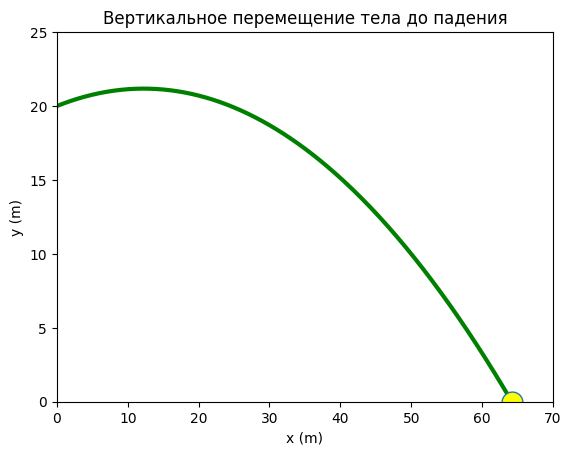

In [85]:
plt.figure()
plt.plot(s_x_ar,s_y_ar,color='green',lw=3)
plt.title('Вертикальное перемещение тела до падения')
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.plot(x_end, y_end, marker="o", markersize=15, markerfacecolor="yellow")

plt.xlim(0, 70)
plt.ylim(0, h_end+15);

### Приближенное решение

In [13]:
t_arr = np.arange(0,T+1,step) #массив t

In [14]:
s_y = h_start+v0_y*t_arr-g*t_arr**2/2 #координаты по y относительно t

In [15]:
for k in range(len(s_y)): #пробегаем все индексы  элементов s_y 
    if s_y[k]*s_y[k+1]<0 : #находим индекс, когда значения меняют знак
        break
k

256

В кратце нам нужно по координатам(по значению y и времени) в k и k+1 найти момент времени t*, в котором y = 0

**Формула линейной интерполяции**
(https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F):
$$f(x)=f(x_0)+\frac{f(x_1) - f(x_0)}{x_1 - x_0}(x-x_0),$$
где в нашем случае $x_0 = t[k], x_1 = t[k+1], f(x_0) = s_y[k], f(x_1) = s_y[k+1]; x = t^*, f(x) = f(t^*) = 0$

In [16]:
t2 = sympy.symbols('t2')
result2 = sympy.solve(s_y[k]+((s_y[k+1]-s_y[k])/(t_arr[k+1]-t_arr[k]))*(t2-t_arr[k]),t2)

In [30]:
t_star_exact2 = result2[0]
t_star_exact2

2.56838403035355

In [31]:
abs(t_star_exact2-t_star_exact) #погрешность между точным и примерным решением

3.25956434510388e-6

### *ДОП - коническая винтовая линия*

In [23]:
s_x = v0_x*t_arr
s_x[k]

64.0

In [29]:
sk = np.array([s_x[k],s_x[k+1]])
sy = np.array([s_y[k],s_y[k+1]])
sk[0]

64.0

In [32]:
x_end2 = np.array([v0_x*t_star_exact2])
y_end2 = np.array([0])

(-0.3730866874999954, 0.23733553000000285)

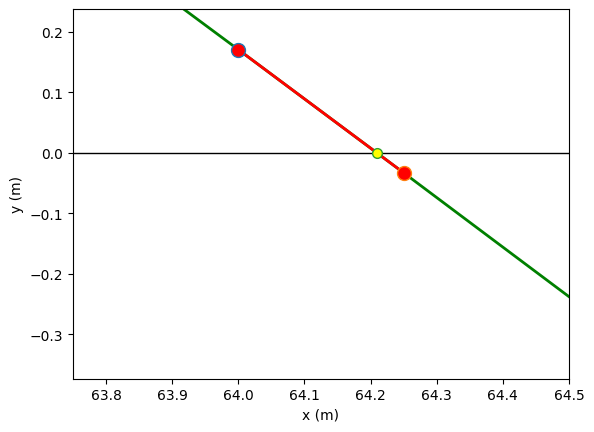

In [34]:
plt.figure()
plt.plot(s_x,s_y,color='green',lw=2) #обычная наша функция
sk[1]
plt.plot(sk,sy, '-',color='red',lw=2) #прямая, соединяющая две тчоки меняющие знак
plt.plot([0,65], [0,0], '-',color='black',lw=1) #просто ось ox
plt.plot(sk[0], sy[0], marker="o", markersize=10, markerfacecolor="red") #верхняя точка
plt.plot(sk[1], sy[1], marker="o", markersize=10, markerfacecolor="red") #нижняя точка
plt.plot(x_end2, y_end2, marker="o", markersize=7, markerfacecolor="yellow") #точка пересечения прямой и ox
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.xlim(s_x[k-1], s_x[k+2])
plt.ylim(-s_y[k-1], -s_y[k+2])

## Задание 1.3. Графики функций

### Вариант 2

a) Роза $\rho = a\sin (\frac{m}{n}\varphi , a \in R ,m,n )$ - натуральные нечетные $m\neq n $

In [ ]:
phi_ar = np.arange(-np.pi/2, np.pi/2, 0.05)
phi_list = phi_ar.tolist() #создаем list чтобы было удобнее

In [ ]:
a = float(input("Параметр a, a - действительное число: "))
m = int(input("Параметр m, m - натуральное нечетное число: "))
n = int(input("Параметр n, n - натуральное нечетное число, не равное m: "))

rho_list = [a*math.sin((m/n)*ph) for ph in phi_list] 
rho_ar = np.array(rho_list)
#rho_ar = abs(np.array(rho_list))



plt.figure()
plt.axes(projection='polar')
plt.plot(phi_ar,rho_ar)
#plt.plot(phi_ar+ (rho_ar<0)*np.pi,abs(rho_ar),'r.')

б)$x = \sqrt{1-t^2}, y = \tan{\sqrt{1+t}}$

In [ ]:
step = 0.01
t_par = np.arange(-1, 1, step) #все возможные t, вход.в обл.опр. x

In [ ]:
x_t_ar = [math.sqrt(1-t**2) for t in t_par]

In [ ]:
y_t_ar = [math.tan(math.sqrt(1+t)) for t in t_par]

In [ ]:
plt.figure() 
plt.plot(x_t_ar,y_t_ar,'b-',lw=2) 
plt.xlabel('x'); plt.ylabel('y') 
plt.axis([x_t_ar[0]-0.1, x_t_ar[-1]+1, y_t_ar[0]-1, y_t_ar[-1]+1]); 

## Задание 1.4. Секущая и касательная к графику функции

### Секущая

In [113]:
p_start = np.array([s_x_array[0],s_y_array[0]]) #координаты начальной точки как массив(так должно быть удобнее)
p_start

array([ 0., 20.])

In [114]:
p_end = np.array([s_x_array[-1],s_y_array[-1]]) 
p_end

array([49.75      , 10.14757617])

In [115]:
a = p_end-p_start #вектор
a

array([49.75      , -9.85242383])

In [116]:
p = [p_start + a*t for t in [-2, 2]] #список массивов, состоящих из точки, принадлежащей прямой
p = np.array(p) #делаем из списка массивов массив(двумерный массив, матрицу)
p

array([[-99.5       ,  39.70484767],
       [ 99.5       ,   0.29515233]])

(-10.0, 60.0, 0.0, 25.0)

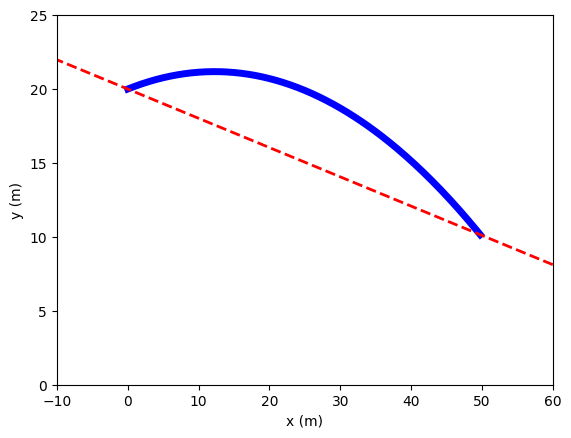

In [117]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=2) #p - матрица, поэтому для x используем 1 элемент каждл
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([-10, s_end+10, 0, h_end+15])

### Касательная

In [144]:
x_set = [x for x in [-10,h_end+15]]
x_set

[-10, 25.0]

In [145]:
y_set = [math.tan(alpha)*(x-s_x_array[0])+s_y_array[0] for x in x_set]
y_set

[18.07734, 24.806649999999998]

(-10.0, 60.0, 0.0, 25.0)

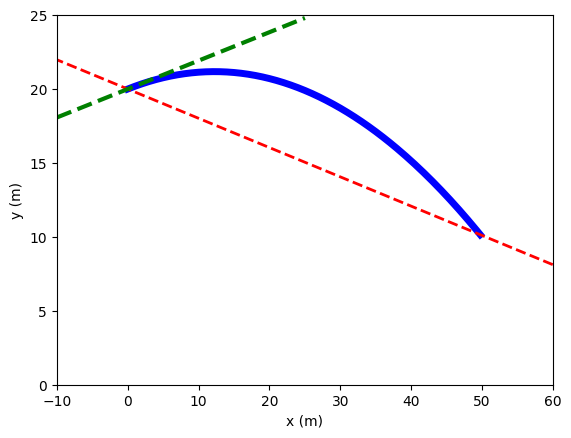

In [146]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=2)
plt.plot(x_set,y_set,'--',color='green',lw=3)
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([-10, s_end+10, 0, h_end+15])

### *ДОП*

In [35]:
t_cur = np.arange(0, 4*math.pi, step)
t_cur

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.254e+01, 1.255e+01,
       1.256e+01])

Параметр a: 10
Параметр b: 2


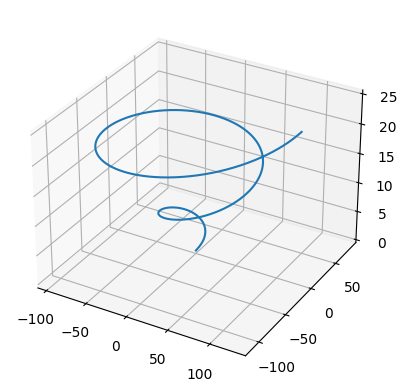

In [37]:
a = float(input("Параметр a: "))
b = float(input("Параметр b: "))



x_cur = np.array([a*t*math.cos(t) for t in t_cur])
y_cur = np.array([a*t*math.sin(t) for t in t_cur])
z_cur = b*t_cur

plt.figure()
plt.axes(projection='3d')
plt.plot(x_cur, y_cur, z_cur, label='parametric curve')

In [1]:
s_start = np.array([0,0,0])

NameError: name 'np' is not defined